# Separation of Previous Code into Environment and Agent Codes

In [ ]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pylab
import gym
import sys
from gym import error, spaces, utils
from gym.utils import seeding
import matplotlib.ticker as plticker
import Gridworld_Env, Q_Learning_Agent

world = Gridworld_Env.gridworld()
agent = Q_Learning_Agent.qLearning(world,'')#'render' with quotes to show environment
agent.work()

## Before Using PyTorch
The neural network model uses array-style inputs and outputs, so I have to change my Q function from it's original form in Q_Learning_Agent to an arrayed form in Q_Learning_Agent_Arrayed.

In [ ]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pylab
import gym
import sys
from gym import error, spaces, utils
from gym.utils import seeding
import matplotlib.ticker as plticker
import Gridworld_Env, Q_Learning_Agent_Arrayed

world = Gridworld_Env.gridworld()
agent = Q_Learning_Agent_Arrayed.qLearning(world,'')#'render' with quotes to show environment
agent.work()

# Getting Used to PyTorch
The below code seems to work, now making it into a class file. Code from https://pytorch.org/tutorials/beginner/pytorch_with_examples.html

However, upon biasing the output deterministically, we see that the learning algorithm is not stable in its performance. However, the perfomance is stable 

In [ ]:
# -*- coding: utf-8 -*-
import torch

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 10, 1, 100, 4

# Create random Tensors to hold inputs and outputs
x = torch.randn(N, D_in)
#xx = torch.randn(D_in,1)
y = torch.randn(N, D_out)*10
#y[0] = torch.tensor([0,10,0,5])

model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, H+100, bias=True),
    torch.nn.ReLU(),
    torch.nn.Linear(H+100, H, bias=True),
#    torch.nn.ReLU(),
#    torch.nn.Linear(H+50, H, bias=True),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)

loss_fn = torch.nn.MSELoss()

learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
for t in range(2000):
    y_pred = model(x)#prediction step is called forward pass
    
#    print(y_pred)
    
    loss = loss_fn(y_pred, y)#loss calculation for feedback
    print(t, loss.item())

    optimizer.zero_grad()
    
    loss.backward()#gradient of loss step is called backward pass
    optimizer.step()

## Making it a class implementation

In [ ]:
# -*- coding: utf-8 -*-
import torch
class test(object):
    def __init__(self):
        
    
# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
        self.N, self.D_in, self.H, self.D_out = 10, 1, 100, 4

# Create random Tensors to hold inputs and outputs
        self.x = torch.randn(self.N, self.D_in)
        self.y = torch.randn(self.N, self.D_out)*10

        self.model = torch.nn.Sequential(
            torch.nn.Linear(self.D_in, self.H),
            torch.nn.ReLU(),
            torch.nn.Linear(self.H, self.H+100, bias=True),
            torch.nn.ReLU(),
            torch.nn.Linear(self.H+100, self.H, bias=True),
            torch.nn.ReLU(),
            torch.nn.Linear(self.H, self.D_out),
)

        self.loss_fn = torch.nn.MSELoss()

        self.learning_rate = 1e-3
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=self.learning_rate)
        pass
    def predict(self,x):
        self.y_pred = self.model(x)
        return self.y_pred
    def update(self,t):
            self.loss = self.loss_fn(self.y_pred, self.y)#loss calculation for feedback

            self.optimizer.zero_grad()
        
            self.loss.backward()#gradient of loss step is called backward pass
            self.optimizer.step()
            return print(t, self.loss.item())
    def work(self):
        for t in range(2000):
            #y_pred = model(x)#prediction step is called forward pass
            self.y_pred = self.predict(self.x)
            self.update(t)
#            print(self.y_pred)
#            print(self.y)
            print(list(self.model.parameters())[0].grad)
            pass
    
testy = test()
testy.work()

### Transfering models between off-policy network and target network

In [ ]:
y_pred
model2 = model
y_pred2 = model2(x)
print(y_pred)
print(y_pred2)

# Implementation of Deep Q-Learning Agent in Gridworld Environment
## Steps for implementation
* Weights initialized 
### Looping
* NN "forward pass" (prediction of Q function) is sent to Agent
* Agent makes decision and observes reward. The reward is sent back to NN along with the currently used Q function
* Send Current Q function estimate for the agent's exploiting policy action (regardless if agent performs action) and newly observed reward to NN class file
* Agent reperforms "forward pass" (prediction of Q function) to facilitate the calculation of loss with respect to the received Q function estimate for agent's exploit action and the observed reward
* Repeat but without weight initialization

## Progress
### Done
* Weights already randomly initialized using above code
### Need to Do
* Forward pass sent to agent
 * Need to include NN in agent's __init__ to enable receiving forward pass output for actions related to agent's state
 * Need to include agent in NN's __init__ to receive state, reward and to receive Q function estimate (y_pred) from agent
#### Progress Notes
Code seems to work with an increased replay_length 

### For restarting Kernel

In [ ]:
import os
os._exit(00)

done


<IPython.core.display.Javascript object>


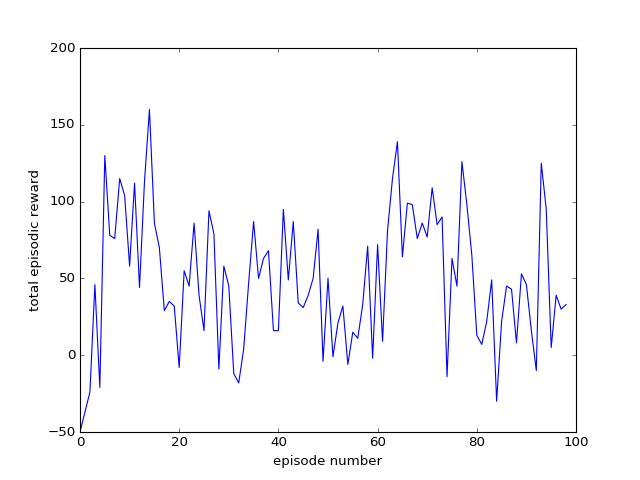

Q function for up action
[[-7.09298515  1.36371195 -5.79046726 -4.04024649 -4.43738651]
 [-6.78848982 -7.09016514 -7.09734106 -6.64047766 -6.84282112]
 [-6.78682852 -7.08229399 -6.94417334 -6.68795156 -6.83107376]
 [-6.89612961 -7.06547594 -7.03628826 -6.77796793 -7.07231474]
 [-7.15041637 -7.21017408 -7.22563601 -7.28325415 -6.9890666 ]]
Q function for down action
[[-6.8852129  -1.53866935 -3.74398327 -6.89597893 -7.22872066]
 [-6.86917448 -7.11474705 -7.08818102 -6.60279703 -6.95108747]
 [-6.86649275 -7.21360636 -6.88926315 -6.65432453 -7.04465675]
 [-6.95711994 -7.31638145 -7.05618811 -6.7516017  -7.13359642]
 [-7.18091202 -7.5301981  -7.5784831  -7.00357485 -7.35011196]]
Q function for left action
[[-7.03259754  3.1042726  -1.46640754 -3.65998864 -3.18066025]
 [-6.98366451 -7.27178097 -7.24967384 -7.04333591 -7.11159515]
 [-7.03351784 -7.34601879 -6.83123016 -7.15600777 -7.16102839]
 [-7.06871891 -7.40888643 -6.8639946  -7.29543352 -7.36249781]
 [-7.30945444 -7.56946039 -7.8599515 

<IPython.core.display.Javascript object>


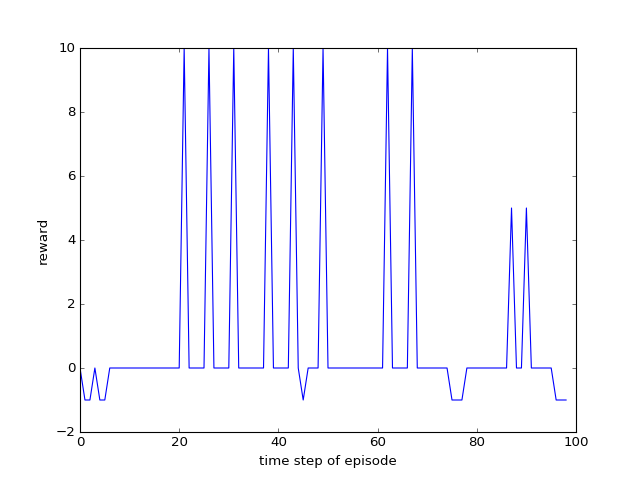

<IPython.core.display.Javascript object>


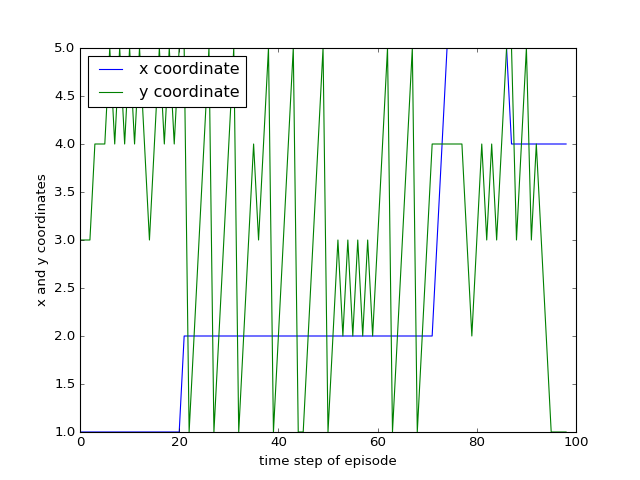

Exploit policy of agent, where: 1 is up, 2 is down, 3 is left and 4 is right
[[2 3 3 3 3]
 [1 4 4 2 1]
 [1 1 4 2 1]
 [1 1 3 2 1]
 [1 1 4 2 1]]


True

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pylab
import gym
import sys
import webbrowser
from gym import error, spaces, utils
from gym.utils import seeding
import matplotlib.ticker as plticker
import Gridworld_Env_General, Q_Learning_Agent_nn
import reluNetworkClass, reluNetworkClass2

world = Gridworld_Env_General.gridworld()
my_nn2 = reluNetworkClass2.qLearningNetwork(world)
my_nn = reluNetworkClass.qLearningNetwork(world,my_nn2)
agent = Q_Learning_Agent_nn.qLearning(world,my_nn,my_nn2,'')#replace '' with 'render' to show environment
agent.work()
webbrowser.open('https://www.youtube.com/watch?v=GNFwBBBNROU&index=4&t=0s&list=PL_kvlVdfWVDE1uQRUzIfD7tywrhsdaT7G')